In [1]:
!pip install ultralytics


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls /content/drive/MyDrive/seg_dataset


data.yaml  images  labels


In [4]:
from ultralytics import YOLO

# Load pre-trained YOLOv8 detection model
model = YOLO("yolov8n.pt")

# Train on your dataset
model.train(
    data="/content/drive/MyDrive/seg_dataset/data.yaml",
    epochs=30,
    imgsz=640
)


Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/seg_dataset/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0,

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79785b73a1e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [5]:
# Load best model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Run detection on validation set
results = model.predict(
    source="/content/drive/MyDrive/seg_dataset/images/val",
    save=True  # saves output images with bounding boxes
)



image 1/20 /content/drive/MyDrive/seg_dataset/images/val/WhatsApp Image 2025-09-22 at 16.08.27.jpeg: 640x480 (no detections), 179.8ms
image 2/20 /content/drive/MyDrive/seg_dataset/images/val/WhatsApp Image 2025-09-22 at 16.08.28.jpeg: 480x640 (no detections), 409.8ms
image 3/20 /content/drive/MyDrive/seg_dataset/images/val/WhatsApp Image 2025-09-22 at 16.08.29.jpeg: 640x480 (no detections), 254.9ms
image 4/20 /content/drive/MyDrive/seg_dataset/images/val/WhatsApp Image 2025-09-22 at 16.08.30.jpeg: 640x480 (no detections), 226.7ms
image 5/20 /content/drive/MyDrive/seg_dataset/images/val/WhatsApp Image 2025-09-22 at 16.08.32 (1).jpeg: 640x480 (no detections), 202.0ms
image 6/20 /content/drive/MyDrive/seg_dataset/images/val/WhatsApp Image 2025-09-22 at 16.08.32.jpeg: 640x480 (no detections), 193.2ms
image 7/20 /content/drive/MyDrive/seg_dataset/images/val/WhatsApp Image 2025-09-22 at 16.10.55.jpeg: 480x640 (no detections), 191.0ms
image 8/20 /content/drive/MyDrive/seg_dataset/images/val/

In [6]:
from ultralytics import YOLO
from google.colab import files
import shutil

# Load your trained model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Upload a custom image (e.g., test.jpg)
uploaded = files.upload()   # browse and upload from your computer

# Get the uploaded file name
image_path = list(uploaded.keys())[0]

# Run detection
results = model.predict(
    source=image_path,
    save=True,        # saves output image with detections
    imgsz=640,        # resize to 640 for consistency
    conf=0.25         # confidence threshold
)

# Move results to Google Drive for easy access
shutil.move("runs/detect/predict", "/content/drive/MyDrive/predict_results")

print("✅ Done! Check /content/drive/MyDrive/predict_results for your output image.")


Saving automobile-62827_1280.jpg to automobile-62827_1280.jpg

image 1/1 /content/automobile-62827_1280.jpg: 544x640 (no detections), 221.2ms
Speed: 6.8ms preprocess, 221.2ms inference, 1.3ms postprocess per image at shape (1, 3, 544, 640)
Results saved to /content/runs/detect/predict2
✅ Done! Check /content/drive/MyDrive/predict_results for your output image.


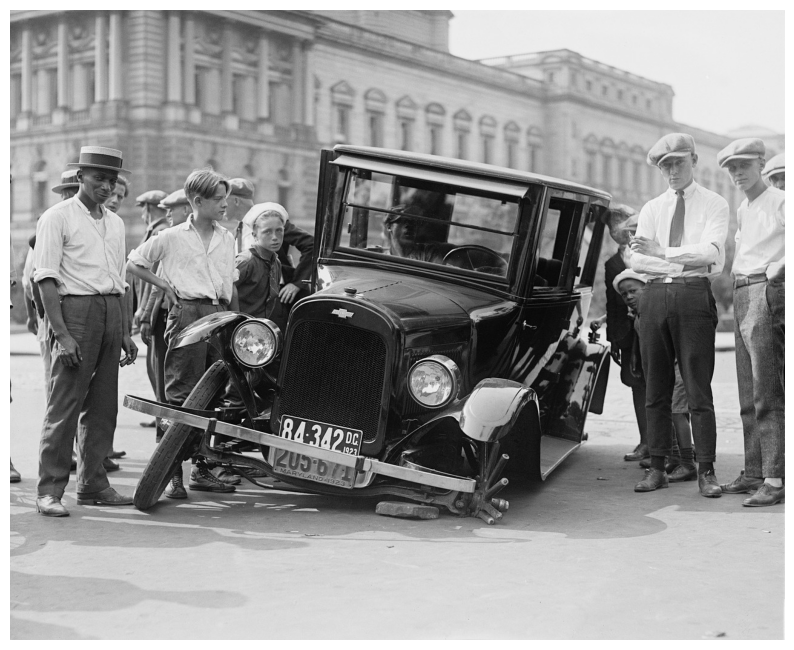

In [7]:
import matplotlib.pyplot as plt
import cv2

# Path to the saved image
predicted_img_path = "runs/detect/predict2/automobile-62827_1280.jpg"

# Read and display
img = cv2.imread(predicted_img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis("off")
plt.show()


Saving elderly-man-6792215_1280.jpg to elderly-man-6792215_1280.jpg

image 1/1 /content/elderly-man-6792215_1280.jpg: 448x640 3 vehicles, 1 pedestrian, 157.7ms
Speed: 5.0ms preprocess, 157.7ms inference, 6.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/runs/detect/predict3


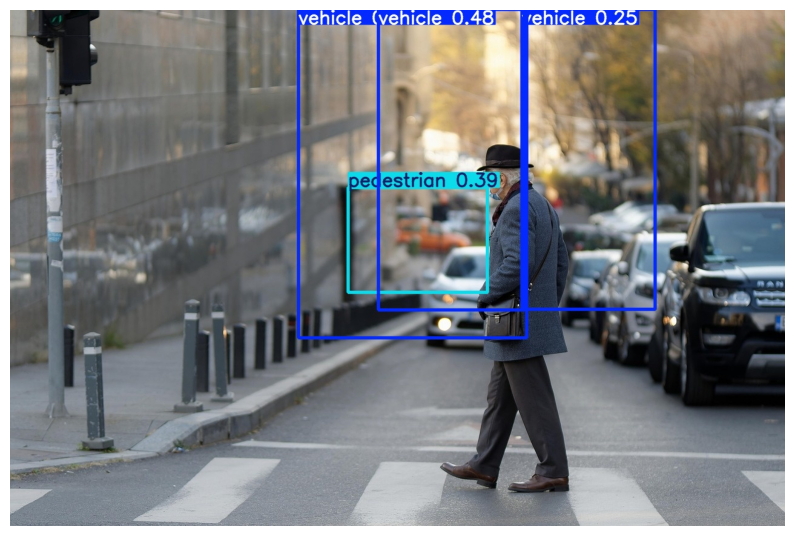

In [9]:
from ultralytics import YOLO
from google.colab import files
import matplotlib.pyplot as plt
import cv2

# Upload a test image
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# Load trained model
model = YOLO("/content/runs/detect/train2/weights/best.pt")

# Run detection
results = model.predict(source=img_path, conf=0.25, save=True)

# Get the path of the saved annotated image
annotated_path = results[0].save_dir + "/" + img_path

# Show annotated image inside Colab
img = cv2.imread(annotated_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis("off")
plt.show()
